# **$\color{Green}{\text{Disruptive Technology 1}}$**
# **Safal Fasal--Notebook**

# **Group** : -  1

### **Section/Group** :- 22AML-107 / A
# **Efforts By :**






*   Anushka Rakesh (22BAI70009)
*   Samudragupta Barma(22BAI70020)

*   Aditya Berry(22BAI70022)
*   Tanushi Aggarwal(22BAI70034)


*  Chaitanya Narang(22BAI70049)


In [2]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")
from pandas import *
from numpy import *
import matplotlib.pyplot as plt

Pycaret installed sucessfully!!


The syntax of the command is incorrect.


In [3]:
dataset =read_csv("data.csv")
dataset.head(10)

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
5,1002.44845,32.66667,5.5,0.19588
6,1002.54647,32.16667,5.5,0.20372
7,1002.67319,31.66667,5.5,0.21386
8,1002.85204,31.16667,5.5,0.22816
9,1002.93563,30.66667,5.5,0.23485


# $\color{Green}{\text{Exploratory Data Analysis}}$

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rainfall     1523 non-null   float64
 1   Temperature  1523 non-null   float64
 2   Ph           1523 non-null   float64
 3   Production   1523 non-null   float64
dtypes: float64(4)
memory usage: 47.7 KB


In [5]:
dataset.columns

Index(['Rainfall', 'Temperature', 'Ph', 'Production'], dtype='object')

In [6]:
dataset.describe()

,Rainfall,Temperature,Ph,Production
count,1523.000000,1523.000000,1523.000000,1523.000000
mean,1027.102072,18.976472,5.897045,2.162630
std,33.114394,5.051640,0.187024,2.633592
min,1000.499200,11.000000,5.500000,0.039940
25%,1010.000000,17.000000,5.800000,0.782910
50%,1015.039060,17.000000,5.800000,1.203130
75%,1024.082230,21.000000,6.000000,1.926580
max,1241.250000,39.000000,6.500000,19.300000


In [7]:
print("dataset.shape -->", dataset.shape)
print("Rows     -->", dataset.shape[0])  ##axis 0---row
print("Columns  -->", dataset.shape[1])   ###column

dataset.shape --> (1523, 4)
Rows     --> 1523
Columns  --> 4


In [8]:
dataset.isnull().sum()

Rainfall       0
Temperature    0
Ph             0
Production     0
dtype: int64

In [9]:
dataset.fillna(0) 

,Rainfall,Temperature,Ph,Production
0,1000.49920,35.00000,5.5,0.03994
1,1001.68519,35.00000,5.5,0.13481
2,1001.95313,34.00000,5.5,0.15625
3,1002.18254,33.66667,5.5,0.17460
4,1002.37279,33.16667,5.5,0.18982
...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000
1519,1138.75000,39.00000,5.8,11.10000
1520,1138.97059,39.00000,5.8,11.11765
1521,1144.65881,35.00000,5.8,11.12760


In [10]:
print(dataset)

        Rainfall  Temperature   Ph  Production
0     1000.49920     35.00000  5.5     0.03994
1     1001.68519     35.00000  5.5     0.13481
2     1001.95313     34.00000  5.5     0.15625
3     1002.18254     33.66667  5.5     0.17460
4     1002.37279     33.16667  5.5     0.18982
...          ...          ...  ...         ...
1518  1137.50000     39.00000  5.8    11.00000
1519  1138.75000     39.00000  5.8    11.10000
1520  1138.97059     39.00000  5.8    11.11765
1521  1144.65881     35.00000  5.8    11.12760
1522  1144.79310     35.00000  5.8    11.13793

[1523 rows x 4 columns]


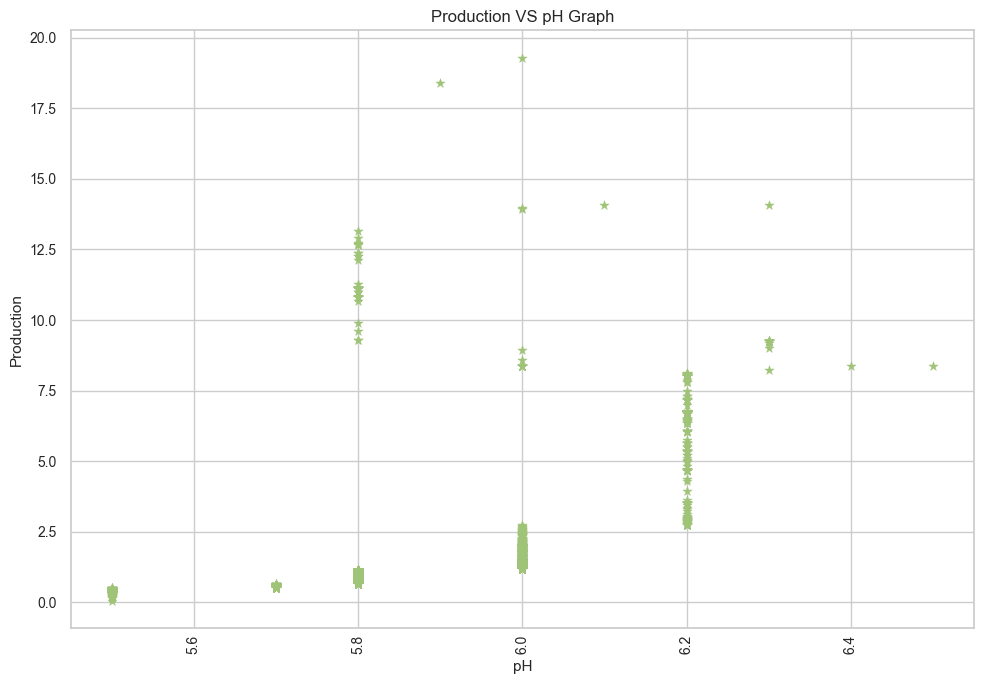

In [11]:
x = dataset['Ph']
y = dataset['Production']

fig, axs = plt.subplots(1, 1, figsize =(10, 7), tight_layout = True)
 
axs.xaxis.set_tick_params(pad = 5)
axs.yaxis.set_tick_params(pad = 10)
 
plt.xlabel('pH')                                   
plt.ylabel('Production')
plt.title('Production VS pH Graph')
plt.xticks(rotation=90)
plt.scatter(x, y, marker = "*",color = "g")

plt.show()

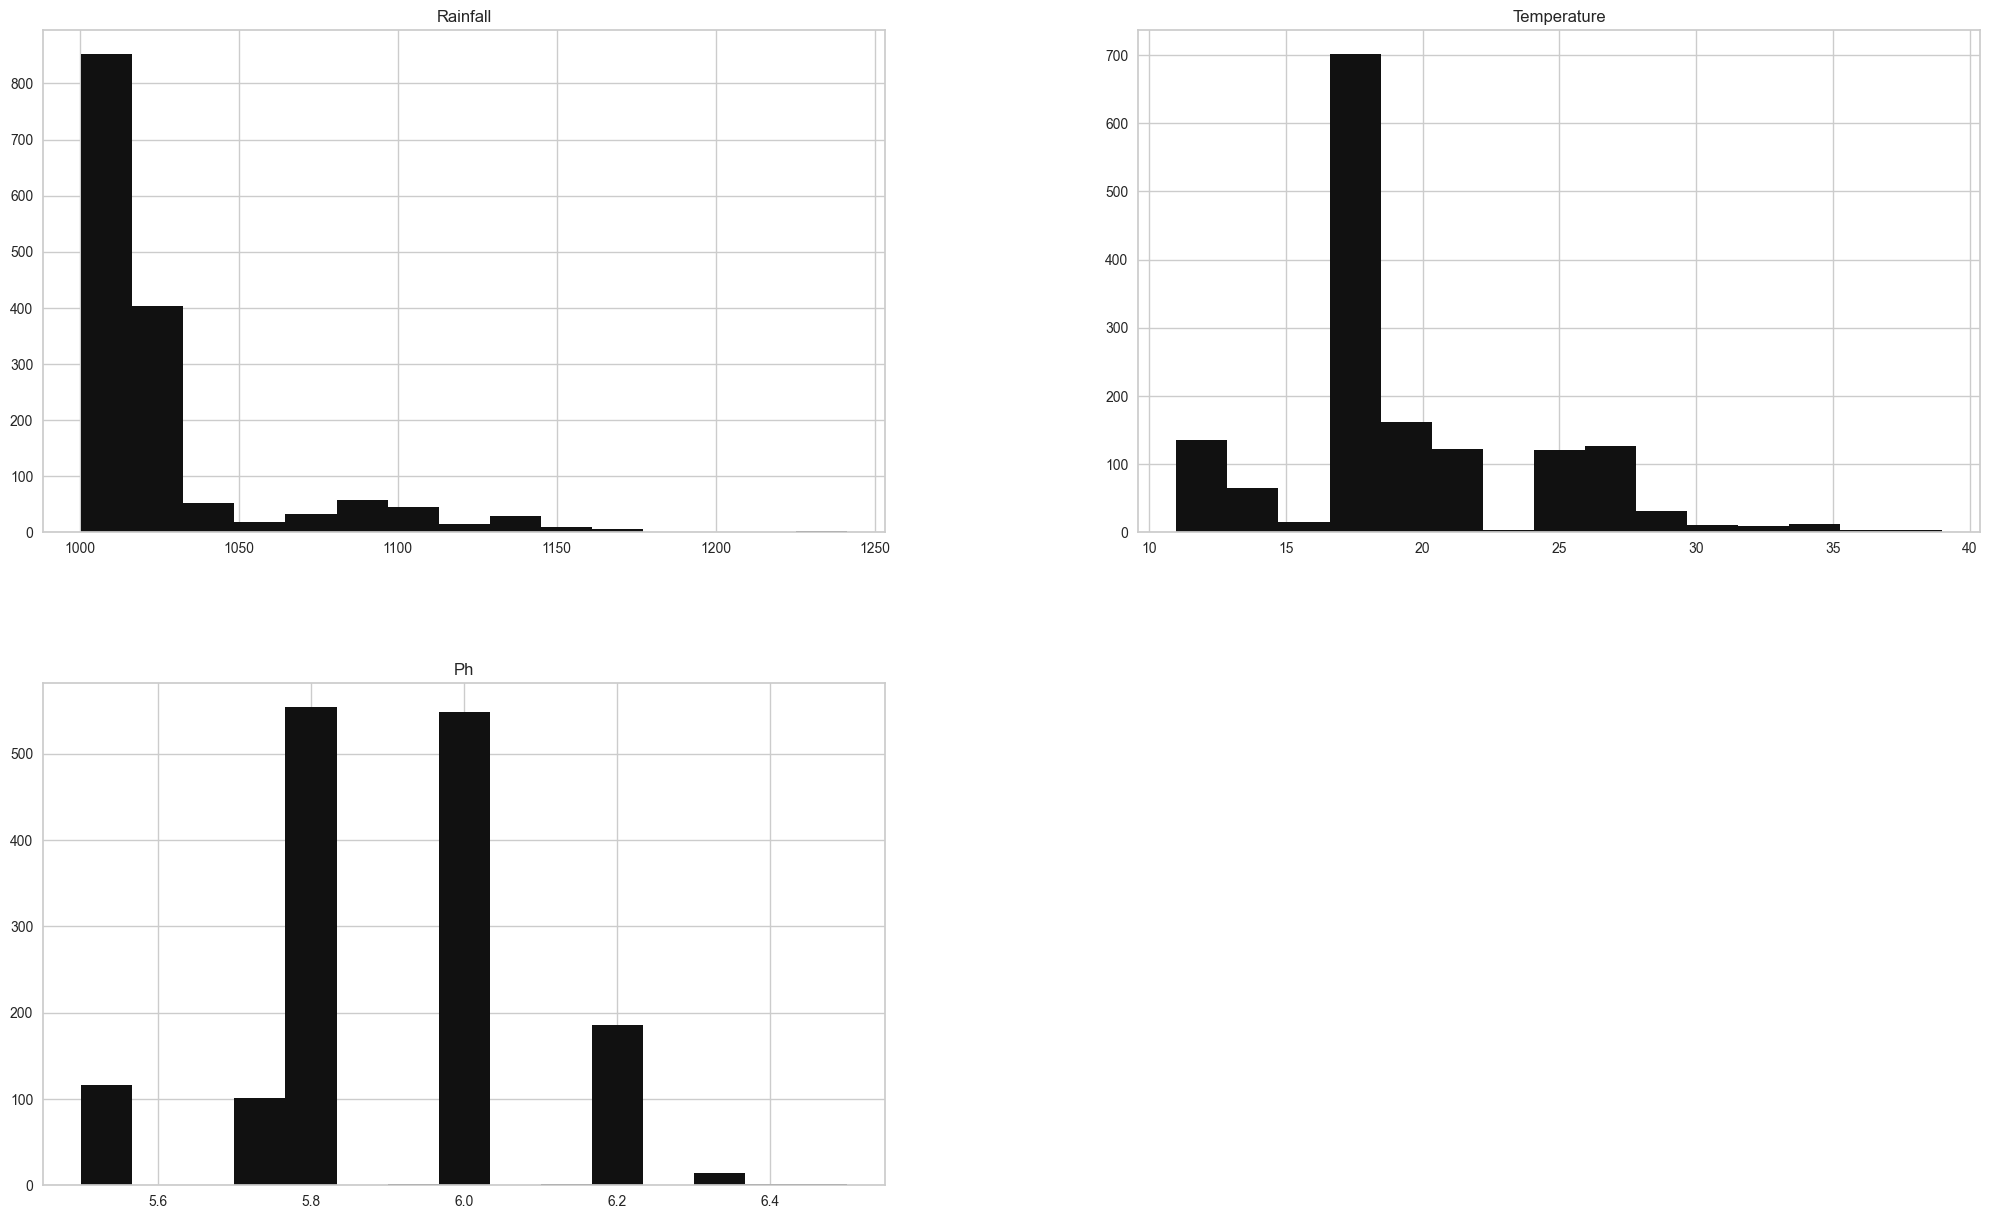

In [12]:
dataset.columns = ['Rainfall', 'Temperature', 'Ph', 'Production']
color = 'k'
data = dataset.copy()
data.drop('Production', axis = 1, inplace = True)
data.hist(bins=15,figsize=(25,15),color=color)
plt.rcParams['font.size'] = 16
plt.show()

In [13]:
from pycaret.regression import * 
s = setup(dataset, target = 'Production',silent=True )

,Description,Value
0,session_id,6601
1,Target,Production
2,Original Data,"(1523, 4)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1066, 3)"


In [14]:
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0168,0.0022,0.0455,0.9997,0.0134,0.0133,0.5140
ridge,Ridge Regression,0.0166,0.0022,0.0455,0.9997,0.0132,0.0129,0.0050
lar,Least Angle Regression,0.0168,0.0022,0.0455,0.9997,0.0134,0.0133,0.0060
omp,Orthogonal Matching Pursuit,0.0149,0.0023,0.0466,0.9997,0.0120,0.0088,0.0050
br,Bayesian Ridge,0.0167,0.0022,0.0455,0.9997,0.0133,0.0131,0.0050
en,Elastic Net,0.0234,0.0026,0.0503,0.9996,0.0135,0.0158,0.0050
lasso,Lasso Regression,0.0311,0.0033,0.0566,0.9995,0.0156,0.0221,0.2370
dt,Decision Tree Regressor,0.0121,0.0198,0.0789,0.9975,0.0069,0.0036,0.0060
gbr,Gradient Boosting Regressor,0.0170,0.0200,0.0700,0.9974,0.0089,0.0099,0.0110
et,Extra Trees Regressor,0.0086,0.0213,0.0707,0.9973,0.0074,0.0040,0.0930


### **Model Performance using data "Normalization"**
---

In [15]:
s = setup(data=dataset, target='Production', normalize = True, normalize_method = 'minmax', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0193,0.0026,0.0482,0.9997,0.0151,0.0162,0.0050
lar,Least Angle Regression,0.0193,0.0026,0.0482,0.9997,0.0151,0.0162,0.0080
br,Bayesian Ridge,0.0193,0.0026,0.0482,0.9997,0.0151,0.0162,0.0080
omp,Orthogonal Matching Pursuit,0.0172,0.0027,0.0489,0.9996,0.0136,0.0105,0.0070
huber,Huber Regressor,0.0090,0.0031,0.0489,0.9996,0.0135,0.0064,0.0120
dt,Decision Tree Regressor,0.0090,0.0032,0.0501,0.9996,0.0063,0.0058,0.0060
gbr,Gradient Boosting Regressor,0.0153,0.0028,0.0464,0.9996,0.0080,0.0124,0.0140
et,Extra Trees Regressor,0.0064,0.0054,0.0490,0.9994,0.0043,0.0041,0.0870
rf,Random Forest Regressor,0.0117,0.0114,0.0715,0.9988,0.0067,0.0058,0.0950
ridge,Ridge Regression,0.1278,0.0409,0.1967,0.9946,0.0772,0.1575,0.0050


### **Model Performance using "Feature Selection"**
---

In [16]:
s = setup(data = dataset, target = 'Production', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0141,0.0023,0.0443,0.9997,0.0139,0.0105,0.0080
ridge,Ridge Regression,0.0141,0.0023,0.0443,0.9997,0.0139,0.0105,0.0060
lar,Least Angle Regression,0.0141,0.0023,0.0443,0.9997,0.0139,0.0105,0.0060
omp,Orthogonal Matching Pursuit,0.0144,0.0023,0.0443,0.9997,0.0135,0.0090,0.0060
br,Bayesian Ridge,0.0141,0.0023,0.0443,0.9997,0.0139,0.0105,0.0070
dt,Decision Tree Regressor,0.0085,0.0025,0.0405,0.9997,0.0066,0.0044,0.0080
et,Extra Trees Regressor,0.0055,0.0028,0.0342,0.9997,0.0075,0.0054,0.0930
gbr,Gradient Boosting Regressor,0.0150,0.0026,0.0424,0.9997,0.0080,0.0107,0.0110
en,Elastic Net,0.0226,0.0026,0.0489,0.9996,0.0146,0.0156,0.0060
lasso,Lasso Regression,0.0302,0.0032,0.0558,0.9995,0.0163,0.0217,0.0060


### **Model Performance using "Outlier Removal"**
---

In [26]:
s = setup(data = dataset, target = 'Production', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0035,0.0004,0.0179,0.9999,0.0108,0.0056,0.0060
dt,Decision Tree Regressor,0.0037,0.0004,0.0155,0.9999,0.0033,0.0021,0.0070
ridge,Ridge Regression,0.0035,0.0004,0.0179,0.9999,0.0108,0.0055,0.0050
et,Extra Trees Regressor,0.0016,0.0002,0.0089,0.9999,0.0019,0.0010,0.0930
rf,Random Forest Regressor,0.0043,0.0004,0.0165,0.9999,0.0035,0.0024,0.0930
gbr,Gradient Boosting Regressor,0.0096,0.0005,0.0201,0.9999,0.0063,0.0081,0.0130
br,Bayesian Ridge,0.0035,0.0004,0.0179,0.9999,0.0108,0.0055,0.0050
omp,Orthogonal Matching Pursuit,0.0032,0.0004,0.0178,0.9999,0.0107,0.0052,0.0060
lar,Least Angle Regression,0.0035,0.0004,0.0179,0.9999,0.0108,0.0056,0.0060
en,Elastic Net,0.0174,0.0010,0.0306,0.9997,0.0127,0.0156,0.0060


### **Model Performance using "Outlier Removal" + "Normalization"**
---

In [18]:
s = setup(data=dataset, target='Production', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'minmax', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0044,0.0005,0.0202,0.9999,0.0121,0.0067,0.0050
lar,Least Angle Regression,0.0044,0.0005,0.0202,0.9999,0.0121,0.0067,0.0040
omp,Orthogonal Matching Pursuit,0.0040,0.0005,0.0201,0.9999,0.0120,0.0062,0.0050
br,Bayesian Ridge,0.0044,0.0005,0.0202,0.9999,0.0121,0.0067,0.0050
huber,Huber Regressor,0.0030,0.0005,0.0200,0.9999,0.0120,0.0051,0.0080
rf,Random Forest Regressor,0.0045,0.0005,0.0192,0.9999,0.0037,0.0023,0.0920
et,Extra Trees Regressor,0.0019,0.0003,0.0103,0.9999,0.0053,0.0037,0.0790
gbr,Gradient Boosting Regressor,0.0101,0.0005,0.0212,0.9998,0.0064,0.0084,0.0110
dt,Decision Tree Regressor,0.0043,0.0006,0.0193,0.9998,0.0038,0.0023,0.0060
knn,K Neighbors Regressor,0.0094,0.0017,0.0373,0.9995,0.0057,0.0041,0.0160


## **Creating a Linear regression Model using "Outlier Removal" + "Normalization"**
###Since:    
* The **lower value of MAE, MSE, and RMSE** implies **higher accuracy of a regression model.**


---



In [19]:
s = setup(data=dataset, target='Production', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'minmax', silent=True)
a=create_model('lr',fold=30)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0019,0.0000,0.0022,1.0000,0.0010,0.0017
1,0.0109,0.0014,0.0380,0.9994,0.0227,0.0189
2,0.0105,0.0014,0.0377,0.9997,0.0224,0.0169
3,0.0029,0.0000,0.0068,1.0000,0.0046,0.0040
4,0.0075,0.0012,0.0348,0.9998,0.0200,0.0106
5,0.0018,0.0000,0.0022,1.0000,0.0011,0.0019
6,0.0100,0.0014,0.0374,0.9989,0.0222,0.0157
7,0.0027,0.0000,0.0066,1.0000,0.0045,0.0038
8,0.0017,0.0000,0.0023,1.0000,0.0014,0.0024


## **Evaluating the Model**

---



In [20]:
evaluate_model(a)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### **Getting the Intercept value for Calculation**

---



In [21]:
a.intercept_

0.13347614

### **Getting the Coefficient values for Calculation**

---



In [22]:
a.coef_

array([ 1.9155531e+01,  2.2114158e-02, -1.2306909e-02], dtype=float32)

## **Saving the model**

---



In [23]:
sm = save_model(a, 'Safal Fasal')

Transformation Pipeline and Model Successfully Saved


## **Loading the Saved Model and predicting using new dataset**

---



In [24]:
a = load_model('Safal Fasal')

Transformation Pipeline and Model Successfully Loaded


In [29]:
newDataSet =read_csv("data.csv")
newDataSet.iloc[:50]
newPredictions = predict_model(a, data = newDataSet)
newPredictions

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0096,0.0026,0.0511,0.9996,0.0140,0.0086


,Rainfall,Temperature,Ph,Production,Label
0,1000.49920,35.00000,5.5,0.03994,0.057601
1,1001.68519,35.00000,5.5,0.13481,0.152431
2,1001.95313,34.00000,5.5,0.15625,0.173070
3,1002.18254,33.66667,5.5,0.17460,0.191148
4,1002.37279,33.16667,5.5,0.18982,0.205961
...,...,...,...,...,...
1518,1137.50000,39.00000,5.8,11.00000,11.011612
1519,1138.75000,39.00000,5.8,11.10000,11.111557
1520,1138.97059,39.00000,5.8,11.11765,11.129195
1521,1144.65881,35.00000,5.8,11.12760,11.580868


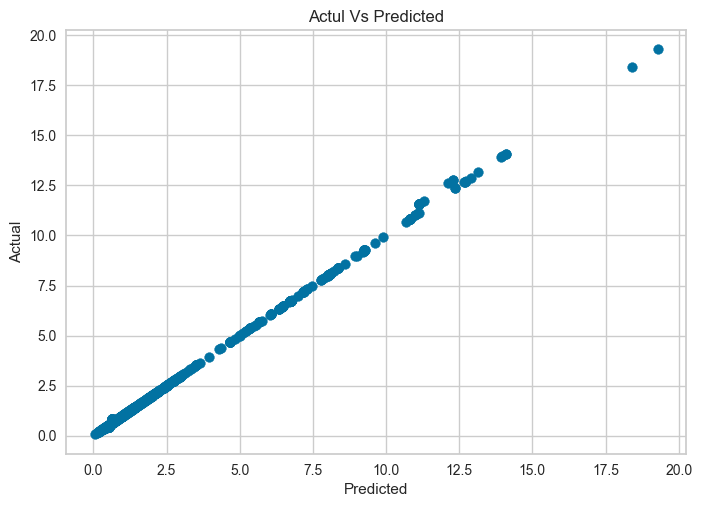

In [30]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

## **Getting the Feature Importance Plot**

---



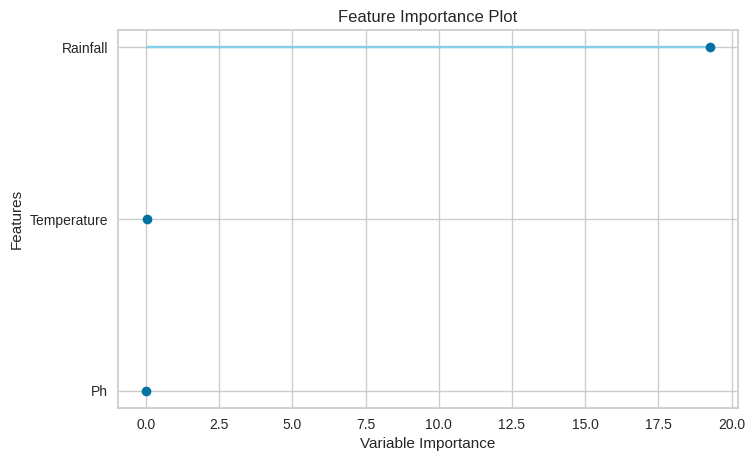

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
lrModel = create_model('lr', verbose=False)
plot_model(lrModel, plot='feature')